# NLP Analysis of ARX HSC logs

In [1]:
import spacy
import matplotlib.pyplot as plt
%matplotlib inline

### Read the log file

In [4]:
# load a medium-sized language model
nlp = spacy.load("en_core_web_md")

with open('../input/npm_cap_noh_half.txt', 'r') as file:
    text = file.read()
    
doc = nlp(text)

## Find the common verb

In [5]:
def produce_plot(result, kind):
    """Save plot of result
    Parameters:
    result: data to draw
    kind: type of data used to plot
    """
    
    plt.bar(range(len(result)),[v for k,v in result], align='center', alpha=0.5)
    plt.ylabel('total')
    plt.xticks(range(len(result)), [k for k,v in result])
    plt.xlabel('term')
    plt.xticks(rotation=90, fontsize=8)
    plt.title("Top {}{}".format(kind, 's'))
    #plt.subplots_adjust(bottom=0.30)

In [12]:
# map with frequency count
def get_pos(pos):
    pos_count = {}
    for token in doc:
        # ignore stop words
        if token.is_stop:
            continue

        if token.pos_ == pos:
            if token.lemma_ in pos_count:
                pos_count[token.lemma_] += 1
            else:
                pos_count[token.lemma_] = 1

    result = sorted({k: v for (k, v) in pos_count.items() if v > 1}.items(),key=lambda kv: kv[1], reverse=True)[:10]
    print("top 10 {}s {}".format(pos,result))

    produce_plot(result, pos)

top 10 NOUNs [('info', 5035), ('job', 3599), ('bool', 2516), ('npm_capture::pkt_comm_server::request_handler_fn(int', 2516), ('clip', 1794), ('time', 1439), ('range', 1439), ('block', 1079), ('pkts', 1078), ('conn', 1029)]


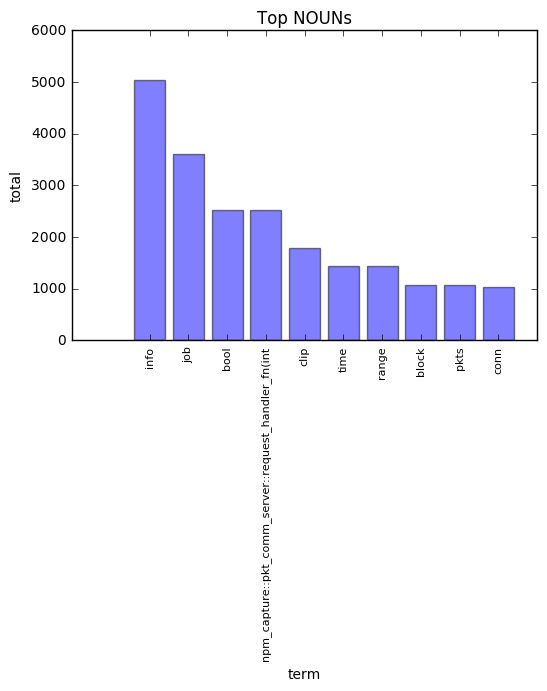

In [13]:
get_pos('NOUN')


top 10 ADJs [('void', 1800), ('uuid', 360), ('free', 323), ('bytes', 20), ('virtual', 2), ('slow', 2)]


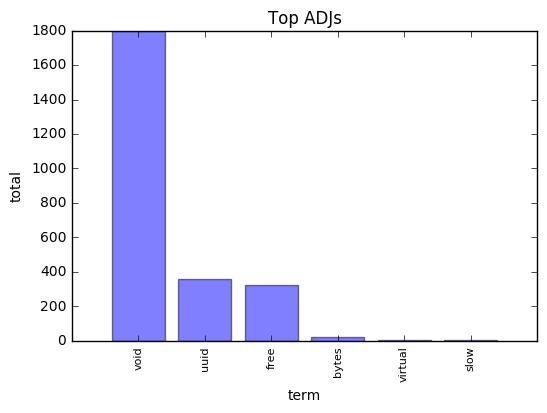

In [14]:
get_pos('ADJ')